In [1]:
pip install statsmodels mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## **Importing necessary libraries and Data Loading**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
devs = tf.config.list_physical_devices('GPU')
for dev in devs:
    tf.config.experimental.set_memory_growth(dev, True)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# Load the dataset
file_path = '/kaggle/input/stock-data-tsla-20-years-shares/TSLA_stock_data.csv'  # Change to your dataset file path
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

## **Basic Exploration**

In [3]:
# Basic Data Exploration
print("### Data Information ###")
print(data.info())
print("\n### Data Description ###")
print(data.describe())

# Check for missing values
print("\n### Missing Values ###")
print(data.isnull().sum())

# Handling Missing Values (if any)
data = data.dropna()  # Dropping rows with missing values

# Display first few rows
print("\n### Sample Data ###")
print(data.head())


### Data Information ###
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3592 entries, 2010-06-29 to 2024-10-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3592 non-null   float64
 1   High       3592 non-null   float64
 2   Low        3592 non-null   float64
 3   Close      3592 non-null   float64
 4   Adj Close  3592 non-null   float64
 5   Volume     3592 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 196.4 KB
None

### Data Description ###
              Open         High          Low        Close    Adj Close  \
count  3592.000000  3592.000000  3592.000000  3592.000000  3592.000000   
mean     77.446837    79.142413    75.643622    77.431415    77.431415   
std     103.266198   105.554437   100.778725   103.198204   103.198204   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%      11.801500    12.068833    11.534000    11.858333    11.858333   
50% 

## **Time Series Decomposition**

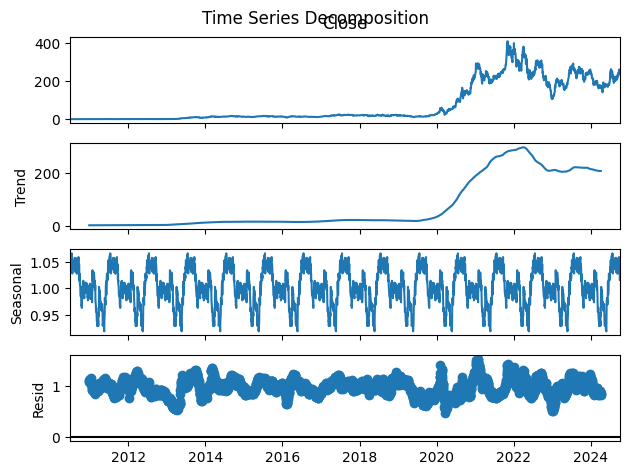

In [4]:
# Time Series Decomposition
decompose_result = seasonal_decompose(data['Close'].dropna(), model='multiplicative', period=252)
decompose_result.plot()
plt.suptitle('Time Series Decomposition')
plt.show()


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def regression_metrics(y_test, y_pred):

    # calculate errors

    mse = mean_squared_error(y_test, y_pred)

    rmse = mean_squared_error(y_test, y_pred, squared=False)

    eps = 1e-10 # a small value to avoid division by zero

    rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred) / (y_test + eps)))))

    #rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred)/y_test)), axis=0))

    mae = mean_absolute_error(y_test, y_pred)

    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    r2_score = sklearn.metrics.r2_score(y_test, y_pred)

    # report error

    print(f'Mean Squared Error: {mse}')

    print(f'Root Mean Square Error: {rmse}')

    print(f'Root Mean Square Percentage Error: {rmspe}')

    print(f'Mean Absolute Error: {mae}')

    print(f'Mean Absolute Percentage Error: {mape}')
    
    print(f'R2 score: {r2_score}')



# Activation functions for comparing
* ReLU
* Tanh
* P_Talu
* Proposed 1 (Tar)
* Proposed 2 (Trh)
* Proposed 3 (Ter)

In [6]:
class P_Talu(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(P_Talu, self).__init__(**kwargs)
        self.a = self.add_weight(name='a', shape=(), initializer='random_uniform', trainable = True)
    def call(self, x):
        return tf.where(
            x > 0,
            x,
            tf.where(
                x > -abs(self.a),
                tf.tanh(x),
                tf.tanh(-abs(self.a))
            )
        )

# Custom Activation Functions

In [7]:
class Tar(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Tar, self).__init__(**kwargs)
        self.a = self.add_weight(name='a', shape=(), initializer='ones', trainable = True)
    def call(self, x):
        tan = (self.a * tf.tanh(x))
        rel = tf.nn.relu(x)
        return tan+rel

class Trh(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Trh, self).__init__(**kwargs)
        self.a = self.add_weight(name='a', shape=(), initializer='ones', trainable = True)
    def call(self, x):
        return tf.where(
            x > 0,
            x,
            self.a * tf.tanh(x)
        )
class Ter(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Ter, self).__init__(**kwargs)
        self.a = self.add_weight(name='a', shape=(), initializer='ones', trainable=True)
    def call(self, x):
        return tf.where(
            x > 0,
            self.a * x,
            tf.tanh(x)
        )

# Model 1 with ReLU 

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 60, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,953 (70.13 KB)

 Trainable params: 17,953 (70.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


I0000 00:00:1730137408.502171     111 service.cc:145] XLA service 0x55da922704e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730137408.502216     111 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


15/89 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2877 - mae: 0.0776

I0000 00:00:1730137411.344573     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.2345 - mae: 0.0639 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0965 - mae: 0.0098 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0589 - mae: 0.0090 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0432 - mae: 0.0078 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0339 - mae: 0.0087 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0271 - mae: 0.0103 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0217 - mae: 0.0084 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0176 - mae: 0.0099 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0142 - mae: 0.0084 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0114 - mae: 0

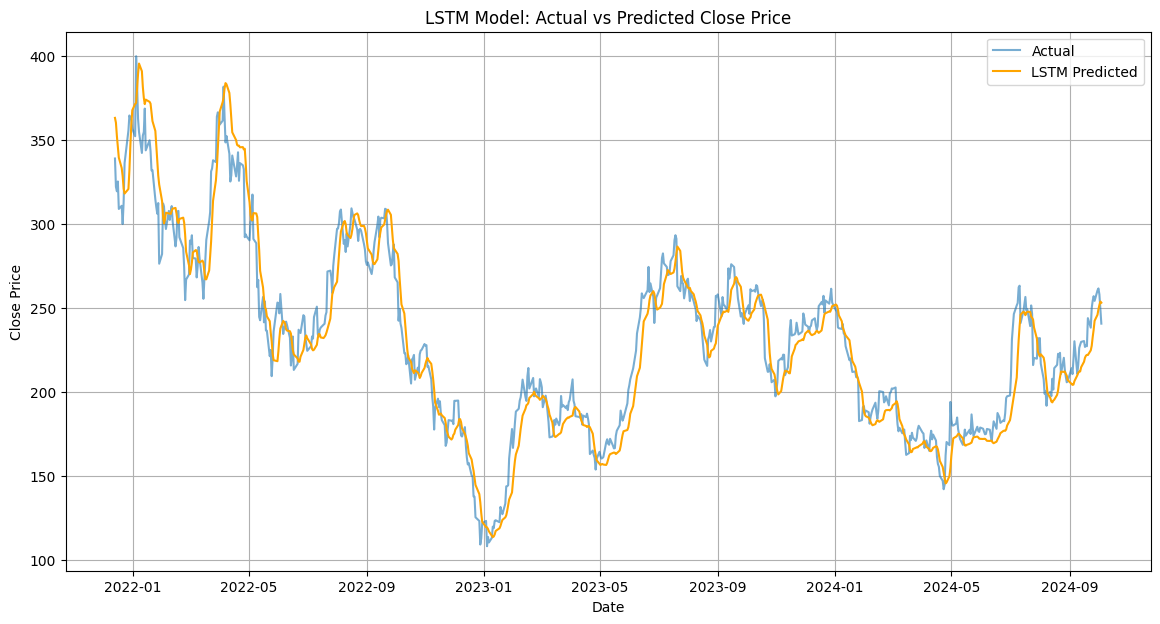

In [8]:
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, GRU, Bidirectional, LSTM

from tensorflow.keras import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]
                                                                                                
# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Activation('relu')(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(LSTM(32, activation='relu', return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)



# Dense layers

dense1 = Dense(16, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)

dense2 = Dense(8, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_lstm = Model(inputs=input_layer, outputs=output_layer)

model_lstm.summary()
calls = [EarlyStopping(monitor='loss', patience=15), ReduceLROnPlateau(monitor='loss', patience=3)]

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_lstm.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='LSTM Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 1 with Tanh

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 60, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,953 (70.13 KB)

 Trainable params: 17,953 (70.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.2463 - mae: 0.0602 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1213 - mae: 0.0133 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0776 - mae: 0.0091 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0561 - mae: 0.0087 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0428 - mae: 0.0064 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0333 - mae: 0.0062 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0262 - mae: 0.0060 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0209 - mae: 0.0072 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0167 - mae: 0.0075 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0135 - mae:

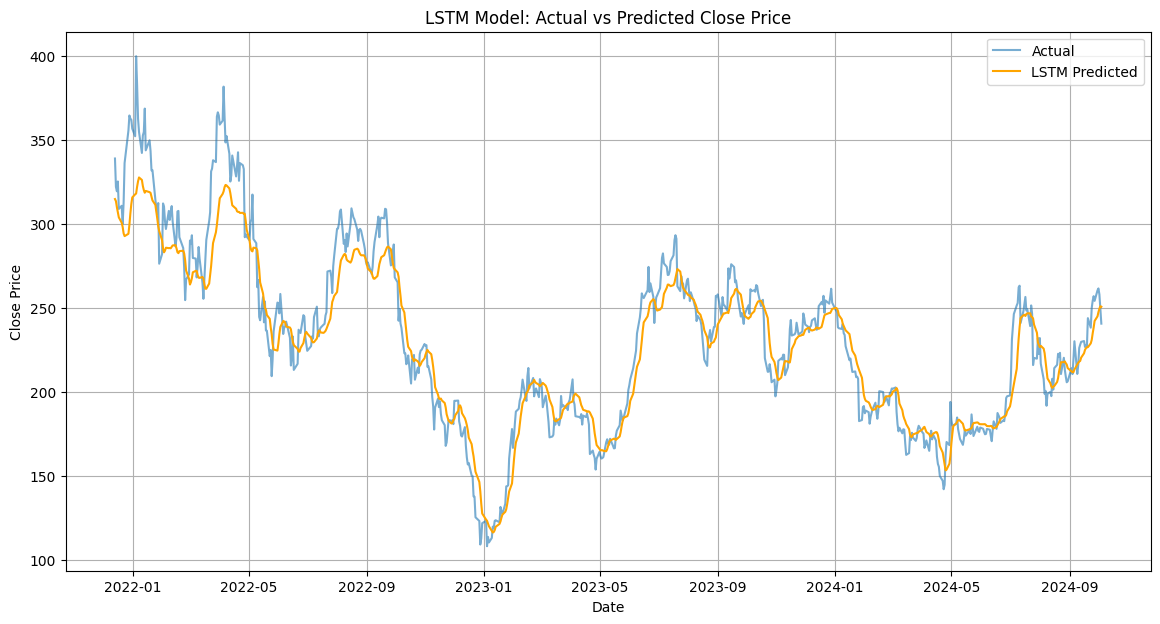

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Activation('tanh')(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(LSTM(32, activation='tanh', return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)



# Dense layers

dense1 = Dense(16, activation='tanh', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)

dense2 = Dense(8, activation='tanh', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_lstm = Model(inputs=input_layer, outputs=output_layer)

model_lstm.summary()

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1,callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_lstm.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='LSTM Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 1 with P_Talu

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p__talu (P_Talu)                │ (None, 60, 32)         │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p__talu_1 (P_Talu)              │ (None, 64)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p__talu_2 (P_Talu)              │ (None, 16)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p__talu_3 (P_Talu)              │ (None, 8)              │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,957 (70.14 KB)

 Trainable params: 17,957 (70.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.2352 - mae: 0.0481 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1051 - mae: 0.0118 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0636 - mae: 0.0098 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0455 - mae: 0.0082 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0351 - mae: 0.0094 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0278 - mae: 0.0079 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0222 - mae: 0.0071 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0178 - mae: 0.0068 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0144 - mae: 0.0063 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.01

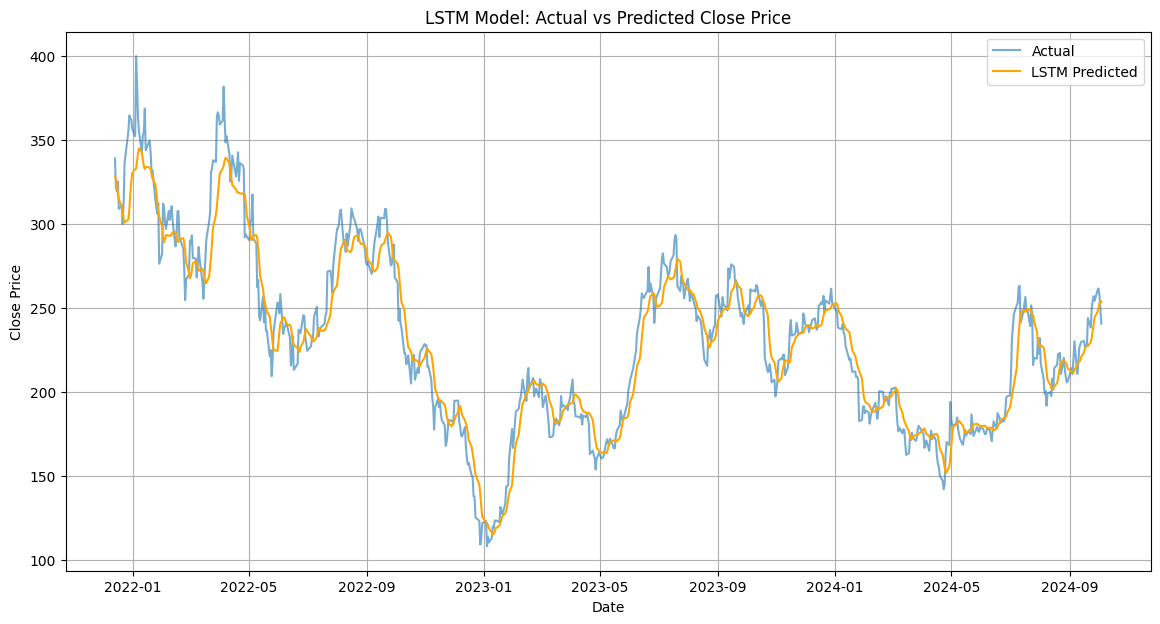

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = P_Talu()(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(LSTM(32, return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)
bilstm_layer = P_Talu()(bilstm_layer)


# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)
dense1 = P_Talu()(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = P_Talu()(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_lstm = Model(inputs=input_layer, outputs=output_layer)

model_lstm.summary()

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_lstm.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='LSTM Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 1 with Tar

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tar (Tar)                       │ (None, 60, 32)         │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tar_1 (Tar)                     │ (None, 64)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tar_2 (Tar)                     │ (None, 16)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tar_3 (Tar)                     │ (None, 8)              │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,957 (70.14 KB)

 Trainable params: 17,957 (70.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2984 - mae: 0.1007 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1718 - mae: 0.0092 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1315 - mae: 0.0082 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1076 - mae: 0.0082 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0907 - mae: 0.0078 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0775 - mae: 0.0066 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0666 - mae: 0.0067 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0576 - mae: 0.0065 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0498 - mae: 0.0057 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.04

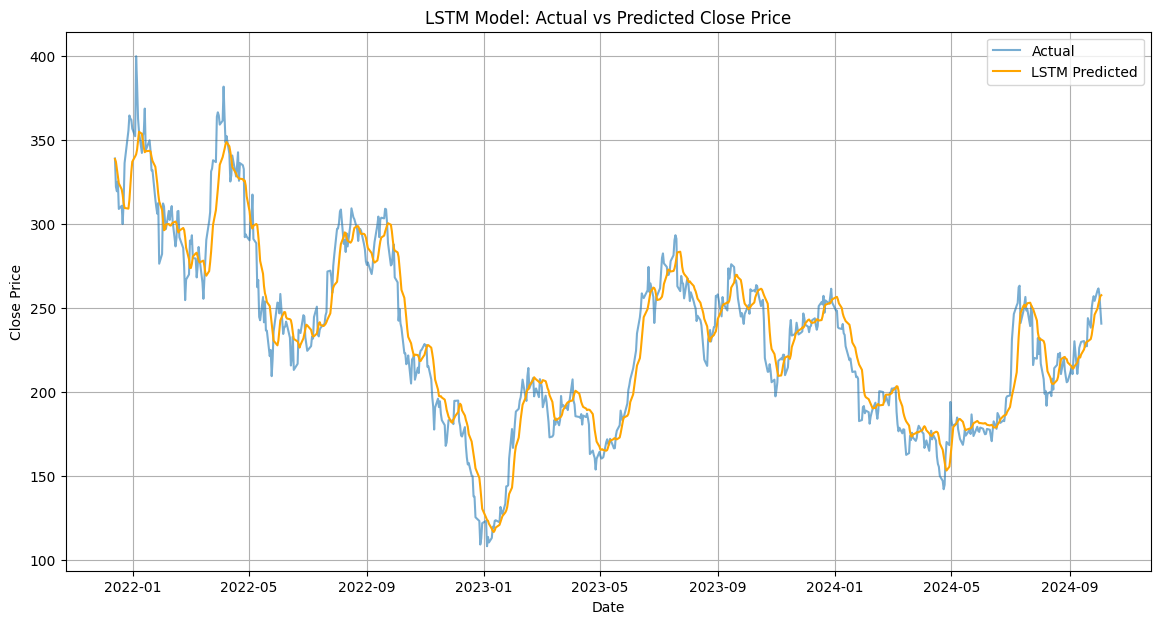

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Tar()(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(LSTM(32, return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)
bilstm_layer = Tar()(bilstm_layer)


# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)
dense1 = Tar()(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Tar()(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_lstm = Model(inputs=input_layer, outputs=output_layer)

model_lstm.summary()

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_lstm.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='LSTM Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 1 with Trh

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ trh (Trh)                       │ (None, 60, 32)         │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ trh_1 (Trh)                     │ (None, 64)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ trh_2 (Trh)                     │ (None, 16)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ trh_3 (Trh)                     │ (None, 8)              │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,957 (70.14 KB)

 Trainable params: 17,957 (70.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2271 - mae: 0.0418 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1026 - mae: 0.0091 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0619 - mae: 0.0093 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0444 - mae: 0.0087 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0343 - mae: 0.0093 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0269 - mae: 0.0072 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0215 - mae: 0.0105 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0171 - mae: 0.0079 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0137 - mae: 0.0100 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.01

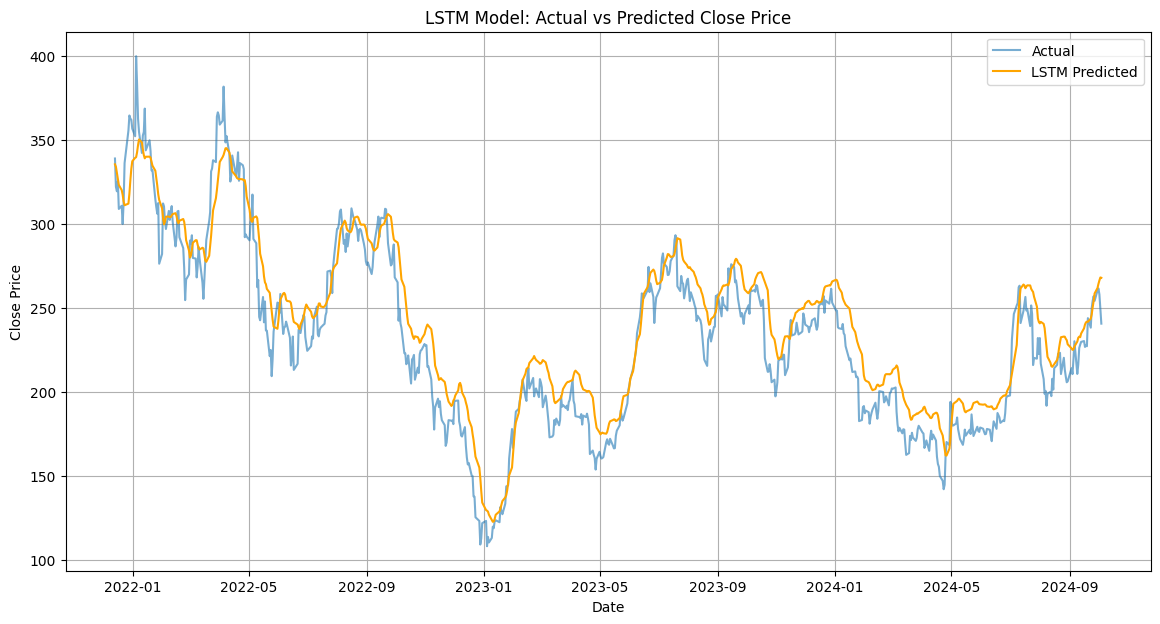

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Trh()(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(LSTM(32, return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)
bilstm_layer = Trh()(bilstm_layer)


# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)
dense1 = Trh()(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Trh()(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_lstm = Model(inputs=input_layer, outputs=output_layer)

model_lstm.summary()

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_lstm.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='LSTM Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 1 with Ter

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ter (Ter)                       │ (None, 60, 32)         │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ter_1 (Ter)                     │ (None, 64)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ter_2 (Ter)                     │ (None, 16)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ter_3 (Ter)                     │ (None, 8)              │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,957 (70.14 KB)

 Trainable params: 17,957 (70.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2258 - mae: 0.0281 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1049 - mae: 0.0078 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0640 - mae: 0.0088 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0463 - mae: 0.0098 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0355 - mae: 0.0077 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0280 - mae: 0.0068 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0223 - mae: 0.0073 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0177 - mae: 0.0061 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0143 - mae: 0.0082 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.01

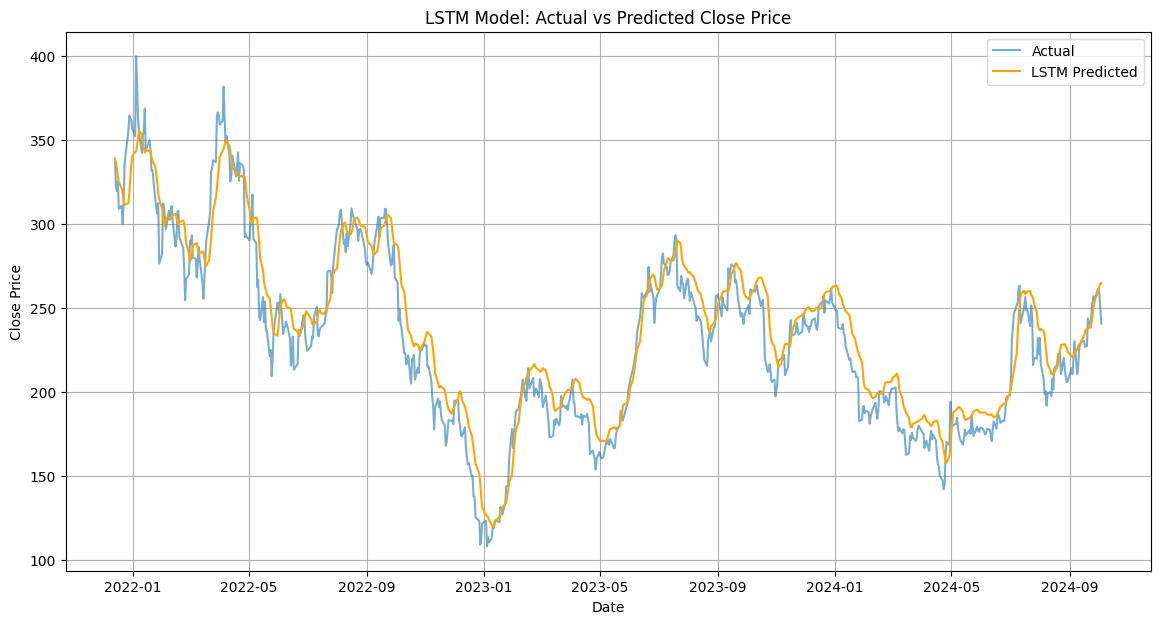

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Ter()(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(LSTM(32, return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)
bilstm_layer = Ter()(bilstm_layer)


# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)
dense1 = Ter()(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Ter()(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_lstm = Model(inputs=input_layer, outputs=output_layer)

model_lstm.summary()

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_lstm.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='LSTM Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 2 with ReLU

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 60, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 64)             │        12,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,985 (54.63 KB)

 Trainable params: 13,985 (54.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 0.1764 - mae: 0.0644 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0521 - mae: 0.0096 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0200 - mae: 0.0082 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0099 - mae: 0.0069 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0064 - mae: 0.0057 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0048 - mae: 0.0054 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0039 - mae: 0.0058 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0035 - mae: 0.0055 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0032 - mae: 0.0061 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0

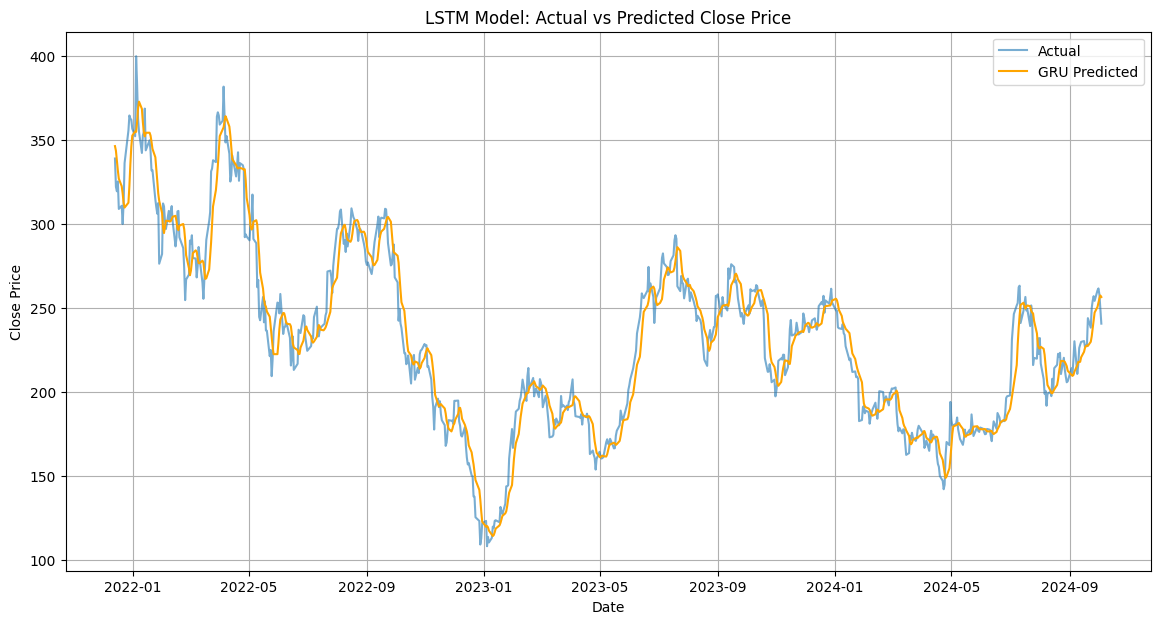

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Bidirectional
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Activation('relu')(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(GRU(32, activation='relu', return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)



# Dense layers

dense1 = Dense(16, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)

dense2 = Dense(8, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_gru = Model(inputs=input_layer, outputs=output_layer)

model_gru.summary()

model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_gru.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_gru.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='GRU Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 2 with Tanh

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 60, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 64)             │        12,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,985 (54.63 KB)

 Trainable params: 13,985 (54.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1595 - mae: 0.0264 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0559 - mae: 0.0074 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0220 - mae: 0.0083 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0106 - mae: 0.0082 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0065 - mae: 0.0076 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0048 - mae: 0.0092 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0039 - mae: 0.0073 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0034 - mae: 0.0079 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0032 - mae: 0.0076 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0031 - mae: 

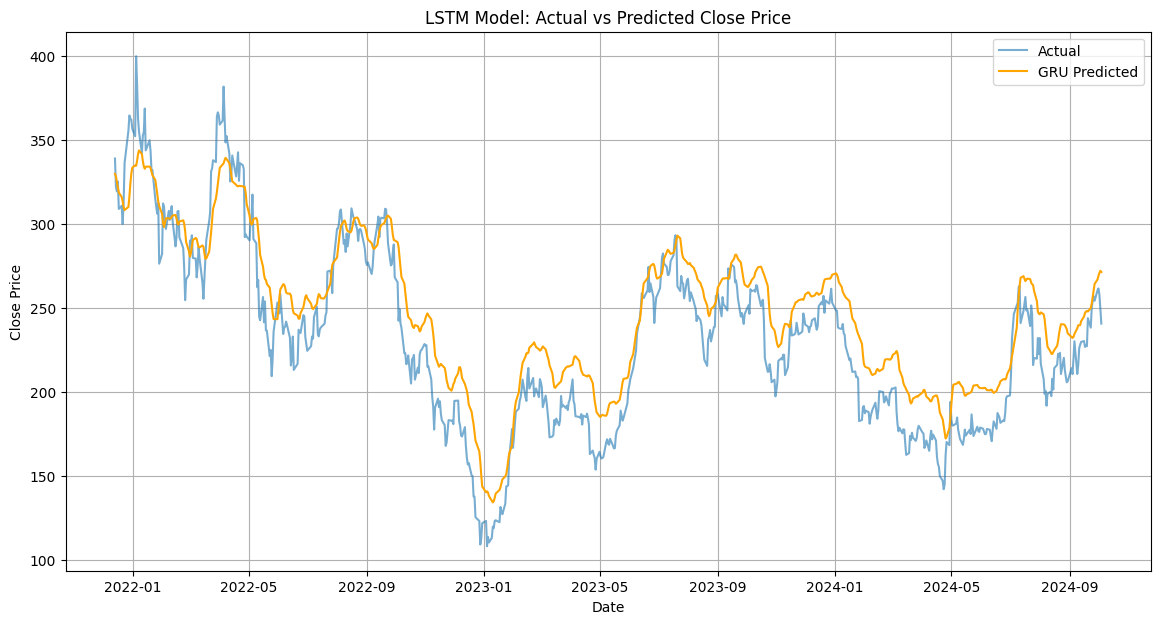

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Bidirectional
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Activation('tanh')(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(GRU(32, activation='tanh', return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)



# Dense layers

dense1 = Dense(16, activation='tanh', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)

dense2 = Dense(8, activation='tanh', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_gru = Model(inputs=input_layer, outputs=output_layer)

model_gru.summary()

model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_gru.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_gru.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='GRU Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 2 with P_Talu

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p__talu_4 (P_Talu)              │ (None, 60, 32)         │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 64)             │        12,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p__talu_5 (P_Talu)              │ (None, 64)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p__talu_6 (P_Talu)              │ (None, 16)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p__talu_7 (P_Talu)              │ (None, 8)              │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,989 (54.64 KB)

 Trainable params: 13,989 (54.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1713 - mae: 0.0403 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0603 - mae: 0.0091 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0251 - mae: 0.0066 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0127 - mae: 0.0061 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0079 - mae: 0.0061 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0058 - mae: 0.0069 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0045 - mae: 0.0053 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0039 - mae: 0.0057 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0035 - mae: 0.0062 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.00

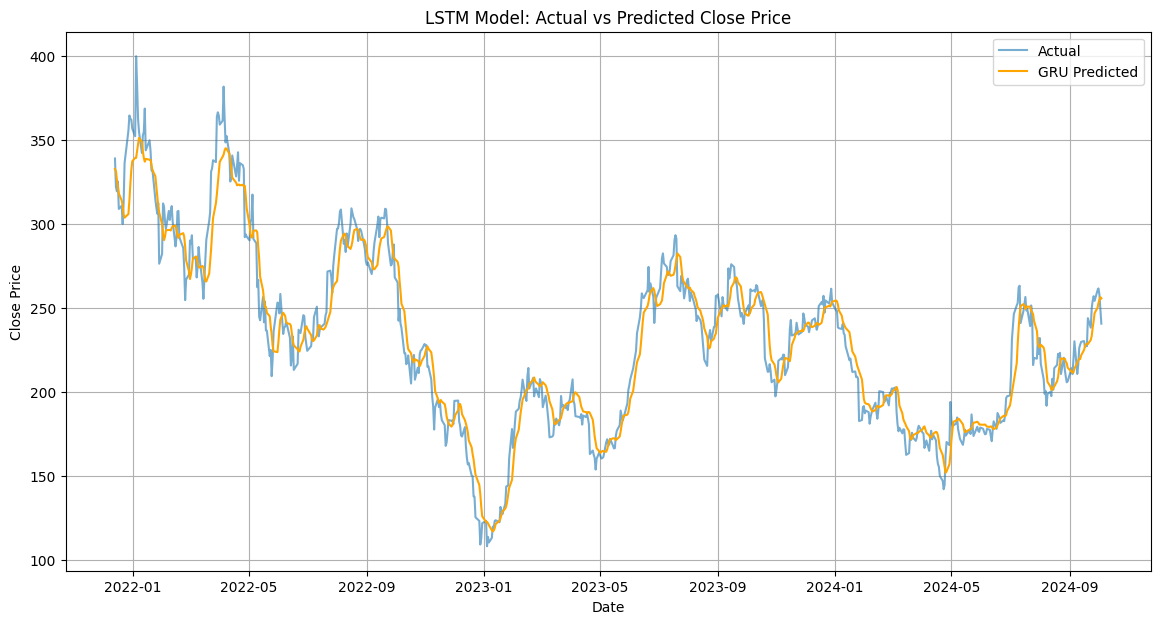

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Bidirectional
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = P_Talu()(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(GRU(32, return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)
bilstm_layer = P_Talu()(bilstm_layer)


# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)
dense1 = P_Talu()(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = P_Talu()(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_gru = Model(inputs=input_layer, outputs=output_layer)

model_gru.summary()

model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_gru.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_gru.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='GRU Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 2 with Tar

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tar_4 (Tar)                     │ (None, 60, 32)         │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 64)             │        12,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tar_5 (Tar)                     │ (None, 64)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tar_6 (Tar)                     │ (None, 16)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tar_7 (Tar)                     │ (None, 8)              │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,989 (54.64 KB)

 Trainable params: 13,989 (54.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2072 - mae: 0.0776 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0966 - mae: 0.0094 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0650 - mae: 0.0062 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0494 - mae: 0.0069 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0397 - mae: 0.0069 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0327 - mae: 0.0065 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0272 - mae: 0.0067 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0229 - mae: 0.0059 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0194 - mae: 0.0060 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0166 - mae

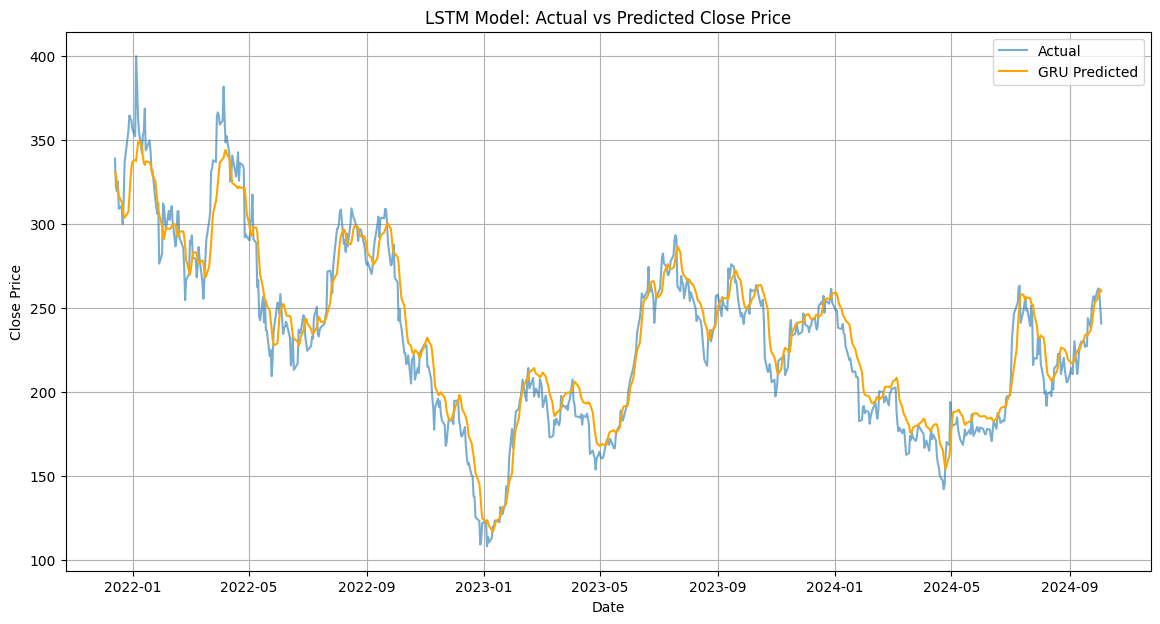

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Bidirectional
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Tar()(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(GRU(32, return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)
bilstm_layer = Tar()(bilstm_layer)


# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)
dense1 = Tar()(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Tar()(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_gru = Model(inputs=input_layer, outputs=output_layer)

model_gru.summary()

model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_gru.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_gru.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='GRU Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 2 with Trh

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ trh_4 (Trh)                     │ (None, 60, 32)         │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (None, 64)             │        12,672 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ trh_5 (Trh)                     │ (None, 64)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ trh_6 (Trh)                     │ (None, 16)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ trh_7 (Trh)                     │ (None, 8)              │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,989 (54.64 KB)

 Trainable params: 13,989 (54.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1626 - mae: 0.0317 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0570 - mae: 0.0075 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0229 - mae: 0.0070 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0114 - mae: 0.0058 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0070 - mae: 0.0082 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0050 - mae: 0.0077 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0039 - mae: 0.0066 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0033 - mae: 0.0062 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0031 - mae: 0.0121 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0026 - ma

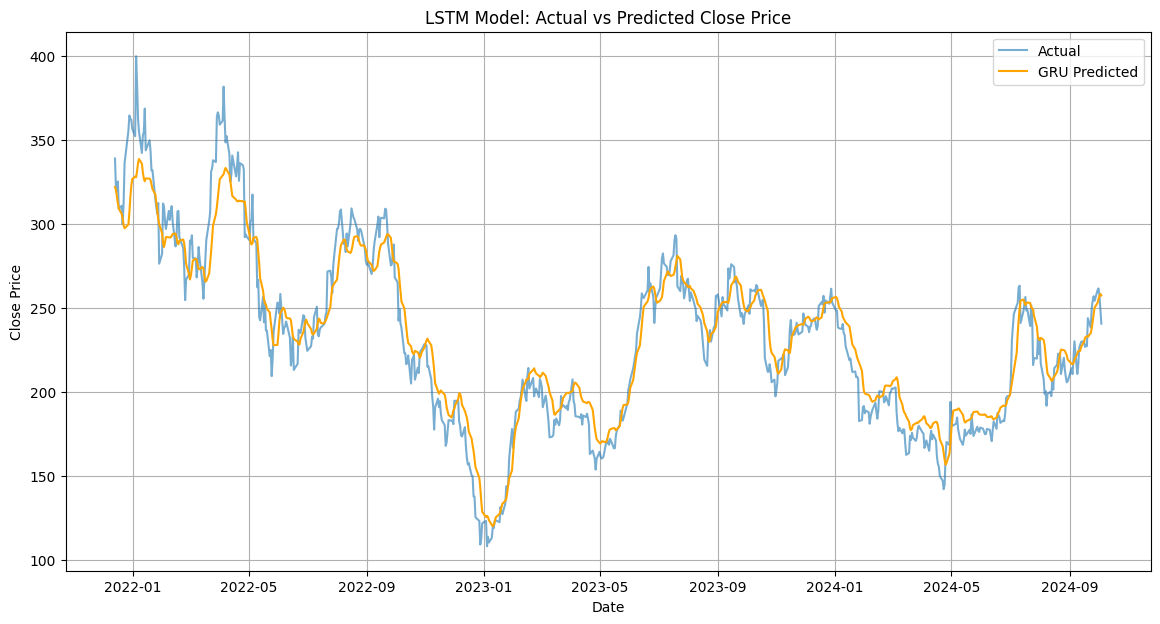

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Bidirectional
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Trh()(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(GRU(32, return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)
bilstm_layer = Trh()(bilstm_layer)


# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)
dense1 = Trh()(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Trh()(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_gru = Model(inputs=input_layer, outputs=output_layer)

model_gru.summary()

model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_gru.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_gru.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='GRU Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# Model 2 with Ter

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 60, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ter_4 (Ter)                     │ (None, 60, 32)         │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 64)             │        12,672 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ter_5 (Ter)                     │ (None, 64)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ter_6 (Ter)                     │ (None, 16)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ter_7 (Ter)                     │ (None, 8)              │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,989 (54.64 KB)

 Trainable params: 13,989 (54.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1619 - mae: 0.0343 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0552 - mae: 0.0075 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0216 - mae: 0.0080 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0106 - mae: 0.0068 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0066 - mae: 0.0071 - learning_rate: 0.0010
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0048 - mae: 0.0070 - learning_rate: 0.0010
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0038 - mae: 0.0063 - learning_rate: 0.0010
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0034 - mae: 0.0079 - learning_rate: 0.0010
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0030 - mae: 0.0087 - learning_rate: 0.0010
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0027 - mae: 

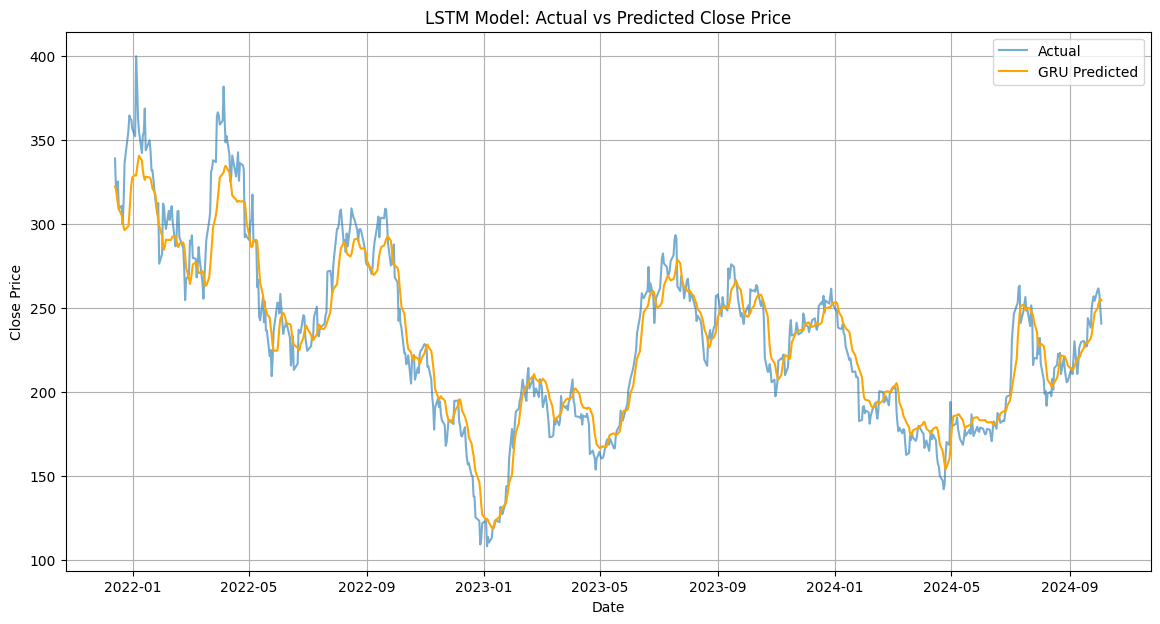

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Bidirectional
from sklearn.preprocessing import MinMaxScaler

# Scaling data for LSTM
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameters
time_step = 60
X_lstm, y_lstm = create_dataset(scaled_close, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# LSTM Model

input_layer = Input(shape=(X_train_lstm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Ter()(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(GRU(32, return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)
bilstm_layer = Ter()(bilstm_layer)


# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)
dense1 = Ter()(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Ter()(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

model_gru = Model(inputs=input_layer, outputs=output_layer)

model_gru.summary()

model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_gru.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1, callbacks=calls)

# Predictions with LSTM
lstm_predictions = model_gru.predict(X_test_lstm)
regression_metrics(y_test_lstm, lstm_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual', alpha=0.6)
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, label='GRU Predicted', color='orange')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
